In [16]:
import os
import pandas as pd

In [14]:
path = "/Users/wangshuaibo/Documents/ScriptsofShuai/gaitpy_exercise/"
os.chdir(path)

In [15]:
xsens_file = "20230413跺脚走6步路测试-XsensMVN.xlsx"

In [17]:
excelfile = pd.ExcelFile(xsens_file)

In [21]:
sheetnames = excelfile.sheet_names
sheetnames

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

In [22]:
df = pd.read_excel(xsens_file,sheet_name='Sensor Free Acceleration')

In [23]:
df.head(3)

,Frame,Pelvis x,Pelvis y,Pelvis z,L5 x,L5 y,L5 z,L3 x,L3 y,L3 z,T12 x,T12 y,T12 z,T8 x,T8 y,T8 z,Neck x,Neck y,Neck z,Head x,Head y,Head z,Right Shoulder x,Right Shoulder y,Right Shoulder z,Right Upper Arm x,Right Upper Arm y,Right Upper Arm z,Right Forearm x,Right Forearm y,Right Forearm z,Right Hand x,Right Hand y,Right Hand z,Left Shoulder x,Left Shoulder y,Left Shoulder z,Left Upper Arm x,Left Upper Arm y,Left Upper Arm z,Left Forearm x,Left Forearm y,Left Forearm z,Left Hand x,Left Hand y,Left Hand z,Right Upper Leg x,Right Upper Leg y,Right Upper Leg z,Right Lower Leg x,Right Lower Leg y,Right Lower Leg z,Right Foot x,Right Foot y,Right Foot z,Right Toe x,Right Toe y,Right Toe z,Left Upper Leg x,Left Upper Leg y,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
0,0,-0.008742,0.019561,-0.011491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.022198,0.031928,0.015490,-0.030291,0.027199,0.012673,-0.020481,-0.033793,0.004478,0,0,0,0.002913,0.018390,-0.013239,-0.005245,0.010545,-0.000286,0.014797,-0.006973,0.026653,0,0,0
1,1,0.016164,0.015704,0.011848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.033936,-0.009515,0.057268,0.011431,0.030747,-0.013874,-0.034071,0.022224,-0.010796,0,0,0,0.004074,0.018191,-0.013241,0.045763,-0.000241,-0.017675,0.034946,0.004807,0.019792,0,0,0
2,2,-0.014526,0.054576,-0.023304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.029544,0.001915,-0.001170,-0.050570,-0.009593,0.017540,0.000290,0.015734,0.012492,0,0,0,0.017936,-0.001576,-0.031757,0.002115,0.029728,-0.028391,0.001224,0.007672,0.012579,0,0,0


In [ ]:
from gaitpy.gait import Gaitpy

raw_data = df
sample_rate = 100 # hertz
subject_height = 170 # centimeters

#### Create an instance of Gaitpy ####
gaitpy = Gaitpy(raw_data,                           # Raw data consisting of vertical acceleration from lumbar location and unix timestamps
                sample_rate,                        # Sample rate of raw data (in Hertz)
                v_acc_col_name='y',                 # Vertical acceleration column name
                ts_col_name='timestamps',           # Timestamp column name
                v_acc_units='m/s^2',                # Units of vertical acceleration
                ts_units='ms',                      # Units of timestamps
                flip=False)                         # If baseline data is at +1g or +9.8m/s^2, set flip=True

#### Classify bouts of gait - Optional (use if your data consists of gait and non-gait periods)####
gait_bouts = gaitpy.classify_bouts(result_file='/my/folder/classified_gait.h5')     # File to save results to (None by default)

#### Extract gait characteristics ####
gait_features = gaitpy.extract_features(subject_height,                               # Subject height
                                        subject_height_units='centimeter',            # Units of subject height
                                        result_file='/my/folder/gait_features.csv',   # File to save results to (None by default)
                                        classified_gait=gait_bouts)                   # Pandas Dataframe or .h5 file results of classify_bouts function (None by default)

#### Plot results of gait feature extraction ####
gaitpy.plot_contacts(gait_features,                                     # Pandas Dataframe or .csv file results of extract_features function
                     result_file='/my/folder/plot_contacts.html)',      # File to save results to (None by default)
                     show_plot=True)                                    # Specify whether to display plot upon completion (True by default)


In [3]:
import pandas as pd

# 创建一个 DataFrame
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

df1

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [4]:
# 创建一个包含 DataFrame 的单元格
cell = pd.DataFrame({'D': [10, 11, 12], 'E': [13, 14, 15], 'F': [16, 17, 18]})

# 使用 update 函数将数据合并到 df1 的单元格中
df1.update(cell)

In [5]:
df1

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [1]:
import re

In [18]:
regex = r"(.*).(.*)"
file = "20220222_flomo_Visual_Analysis.ipynb"
endwith = re.search(regex,file).group(1)

In [17]:
endwith

'20220222_flomo_Visual_Analysis.ipynb'

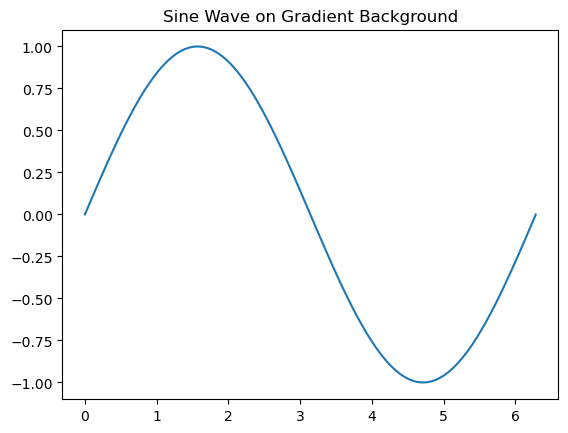

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个 100x100 的二维数组，每个元素的值为从 0 到 1 的随机数
data = np.random.rand(100, 100)

# 创建一个新的 figure 和 axes 对象
fig, ax = plt.subplots()

# 绘制一个填充整个画布的矩形，并将其作为背景
#ax.imshow(data, cmap='Blues', extent=[0, 13, 0, 13], alpha=0.01, aspect='auto', zorder=-1)

# 绘制正弦曲线
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
ax.plot(x, y)

# 设置 plot 的标题
ax.set_title('Sine Wave on Gradient Background')

plt.show()


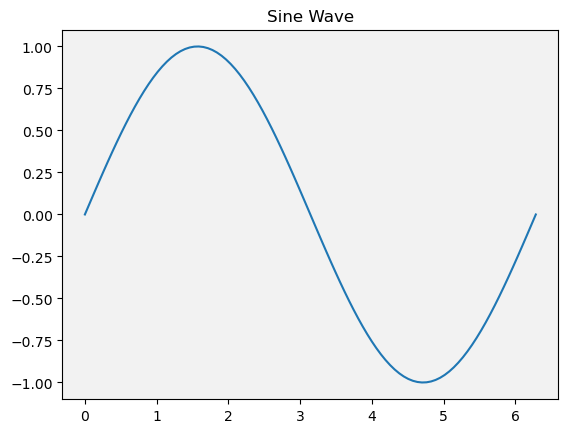

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个新的 figure 和 axes 对象
fig, ax = plt.subplots()

# 绘制正弦曲线
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
ax.plot(x, y)

# 设置 plot 的标题
ax.set_title('Sine Wave')

# 设置画布背景色为浅灰色
ax.set_facecolor('#f2f2f2')

plt.show()


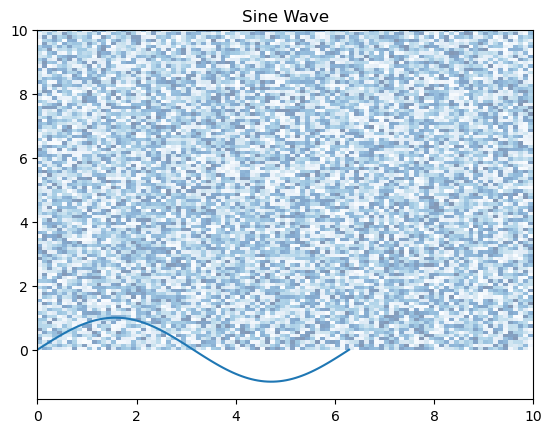

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个 100x100 的二维数组，每个元素的值为从 0 到 1 的随机数
data = np.random.rand(100, 100)

# 创建一个新的 figure 和 axes 对象
fig, ax = plt.subplots()

# 绘制一个填充整个画布的矩形，并将其作为背景
ax.imshow(data, cmap='Blues', extent=[0, 10, 0, 10], alpha=0.5, aspect='auto', zorder=-1)

# 绘制正弦曲线
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
ax.plot(x, y)

# 设置 plot 的标题
ax.set_title('Sine Wave')

plt.show()


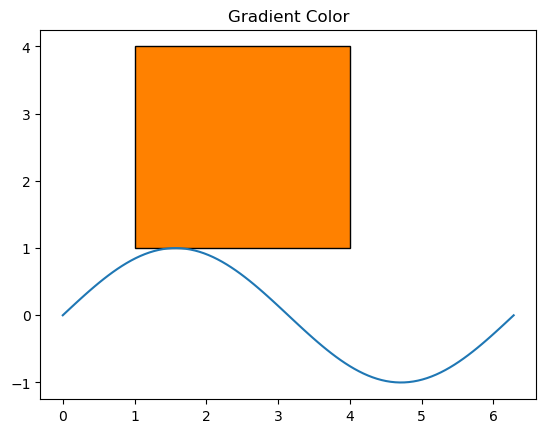

In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QLineEdit, QPushButton, QVBoxLayout


class BMIWidget(QWidget):
    def __init__(self):
        super().__init__()

        # 创建标签和文本框控件
        self.height_label = QLabel("身高（米）：")
        self.height_edit = QLineEdit()
        self.weight_label = QLabel("体重（千克）：")
        self.weight_edit = QLineEdit()
        self.result_label = QLabel()

        # 创建计算按钮
        self.calculate_button = QPushButton("计算")
        self.calculate_button.clicked.connect(self.calculate_bmi)

        # 创建布局管理器
        layout = QVBoxLayout()
        layout.addWidget(self.height_label)
        layout.addWidget(self.height_edit)
        layout.addWidget(self.weight_label)
        layout.addWidget(self.weight_edit)
        layout.addWidget(self.calculate_button)
        layout.addWidget(self.result_label)

        # 设置窗口的布局管理器
        self.setLayout(layout)

    def calculate_bmi(self):
        # 获取身高和体重的值
        height = float(self.height_edit.text())
        weight = float(self.weight_edit.text())

        # 计算 BMI 值
        bmi = weight / (height ** 2)

        # 显示计算结果
        self.result_label.setText("您的BMI值为：{:.2f}".format(bmi))


if __name__ == '__main__':
    # 创建应用程序对象
    app = QApplication(sys.argv)

    # 创建窗口对象
    window = BMIWidget()
    window.setWindowTitle("BMI计算器")
    window.resize(300, 200)

    # 显示窗口
    window.show()

    # 运行应用程序，进入事件循环
    sys.exit(app.exec_())

2023-05-13 17:43:54.618 python[44677:14140269] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


SystemExit: 0

/Users/wangshuaibo/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

In [1]:
# 旋转矩阵转换为四元数
# Todo 增加更多数据进行验证
from scipy.spatial.transform import Rotation as R
r = R.from_quat([1,0,0,0])
eulers = r.as_euler("zyx",degrees=True)

In [31]:
# 目的：
# 1. 验证使用 Scipy 将旋转矩阵转换为四元数的结果和 Opensim 计算四元数的结果是否一致
# 2. 确认 Xsens 中的旋转矩阵排列方式
# 使用 OpenSense 示例子中的数据
# 躯干编号  _00B42268
import numpy as np

opensim_torso_quat = [0.5105588968224414,0.4570645371936038,-0.6688411554744984,0.2882240976375608]
print("Opensim 由xsens 旋转矩阵计算得到的四元数：\n",opensim_torso_quat )

mat11,mat21,mat31 = [-0.060844, -0.317097,  0.946440]
mat12,mat22,mat32 = [-0.905718,  0.416038,  0.081164]
mat13,mat23,mat33 = [-0.419492, -0.852269, -0.312513]

xsens_torso_matrix_11_21_31 = np.array([
                                    [mat11,mat21,mat31],
                                    [mat12,mat22,mat32],
                                    [mat13,mat23,mat33]])

r = R.from_matrix(xsens_torso_matrix_11_21_31)
cal_torso_quat = r.as_quat()
cal_torso_quat_wxyz = [cal_torso_quat[3],cal_torso_quat[0],cal_torso_quat[1],cal_torso_quat[2]]

print("\nScipy 由四元数计算得到的四元数（已经调整四元数的顺序）：\n",
      "旋转矩阵的顺序为：\n",
      "mat11_21_31 \n",
      "mat12_22_32 \n",
      "mat13_23_33 \n",
     cal_torso_quat_wxyz)

xsens_torso_matrix_11_21_31 = np.array([
                                    [mat11,mat12,mat13],
                                    [mat21,mat22,mat23],
                                    [mat31,mat32,mat33]])

r = R.from_matrix(xsens_torso_matrix_11_21_31)
cal_torso_quat = r.as_quat()
cal_torso_quat_wxyz = [cal_torso_quat[3],cal_torso_quat[0],cal_torso_quat[1],cal_torso_quat[2]]

print("\nScipy 由四元数计算得到的四元数（已经调整四元数的顺序）：\n",
      "旋转矩阵的顺序为：\n",
      "mat11_21_31 \n",
      "mat12_22_32 \n",
      "mat13_23_33 \n",
     cal_torso_quat_wxyz)

# 为什么使用 Scipy 计算得到的 quat 和 Opensim 计算得到的 quat 相差一个 "_"


Opensim 由xsens 旋转矩阵计算得到的四元数：
 [0.5105588968224414, 0.4570645371936038, -0.6688411554744984, 0.2882240976375608]

Scipy 由四元数计算得到的四元数（已经调整四元数的顺序）：
 旋转矩阵的顺序为：
 mat11_21_31 
 mat12_22_32 
 mat13_23_33 
 [0.5105588968224414, -0.45706453719360385, 0.6688411554744984, -0.2882240976375608]

Scipy 由四元数计算得到的四元数（已经调整四元数的顺序）：
 旋转矩阵的顺序为：
 mat11_21_31 
 mat12_22_32 
 mat13_23_33 
 [-0.5105588968224414, -0.45706453719360385, 0.6688411554744984, -0.2882240976375608]


In [44]:
# 目的：验证使用 Scipy 将旋转矩阵转换为四元数与 Xsens 自身四元数是否一致
# 结果：
# 1. scipy 计算结果与原始数据不一致
# 2. Xsens 旋转矩阵转四元数与 OpenSim 旋转矩阵转欧拉角一致
# 3. Xsens 四元数与 OpenSim 四元数的表示都是 （w，x，y，z）
# 数据来自：OneDrive-bsu.edu.cn/Archive/文件_XsensMVN输出文档/XsensMTw_ExampleData.txt

xsens_MTw_quat = [-0.03427, -0.695192, 0.066517, -0.714919]
xsens_MTw_euler = [-62.631684, -86.936562, -125.54477]

mat11,mat21,mat31 = [-0.031068, -0.043483,  0.998571]
mat12,mat22,mat32 = [-0.141484, -0.988802, -0.04746]
mat13,mat23,mat33 = [ 0.989453, -0.142757,  0.024568]

xsens_Mtw_matrix_11_21_31 = np.array([
                                    [mat11,mat12,mat13],
                                    [mat21,mat22,mat23],
                                    [mat31,mat32,mat33]])

r = R.from_matrix(xsens_Mtw_matrix_11_21_31)
cal_Mtw_quat = r.as_quat()
cal_Mtw_quat_wxyz = [cal_Mtw_quat[3],cal_Mtw_quat[0],cal_Mtw_quat[1],cal_Mtw_quat[2]]
print("\nScipy 由四元数计算得到的四元数（已经调整四元数的顺序）：\n",
      "旋转矩阵的顺序为：\n",
      "mat11_21_31 \n",
      "mat12_22_32 \n",
      "mat13_23_33 \n",
     cal_Mtw_quat_wxyz)

final_Mtw_quat_wxyz = [-np.round(quat,6) for quat in cal_Mtw_quat_wxyz]
print("调整 - 后的结果：\n", final_Mtw_quat_wxyz)
print("原始 4 元数:\n",xsens_MTw_quat)




Scipy 由四元数计算得到的四元数（已经调整四元数的顺序）：
 旋转矩阵的顺序为：
 mat11_21_31 
 mat12_22_32 
 mat13_23_33 
 [0.0342699535952804, 0.6951917860665067, -0.06651695149063225, 0.7149191884616265]
调整 - 后的结果：
 [-0.03427, -0.695192, 0.066517, -0.714919]
原始 4 元数:
 [-0.03427, -0.695192, 0.066517, -0.714919]


# 以下是 C++ 代码


C++ 当中没有 print() 函数，但是有 std::cout 这个函数可以输出内容
C++ 所有的代码完成后要加上;
C++ 代码里不是用缩进表示函数，而是用{}
C++ 代码里要把子函数放在最上面，main 函数放在最下面
C++ 需要对每一个变量前加上数据类型，每个函数前都有返回值，所以函数前需要加数据类型
C++ 主函数前必须加int 代表程序正常运行返回 0，所以只能是int
以下 C++ 可以在 https://wandbox.org/# 运行
```C++
#include <iostream>
int main(){
    std::cout << "hello world";
    //return 0;
}


如何计算 BMI
#include <iostream>
double calculate_BMI(double weight, double height){
    double BMI = weight/height/height;
    return BMI;
}

int main(){
    double weight = 60.0;
    double height = 1.6;
    double BMI = calculate_BMI(weight, height);
    std::cout << BMI;
}

In [2]:
i = 0
for i in range(3):
    for j in range(3):
        print("ij:",i,j)


ij: 0 0
ij: 0 1
ij: 0 2
ij: 1 0
ij: 1 1
ij: 1 2
ij: 2 0
ij: 2 1
ij: 2 2


# 绘制正常人步态关节角度变化

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


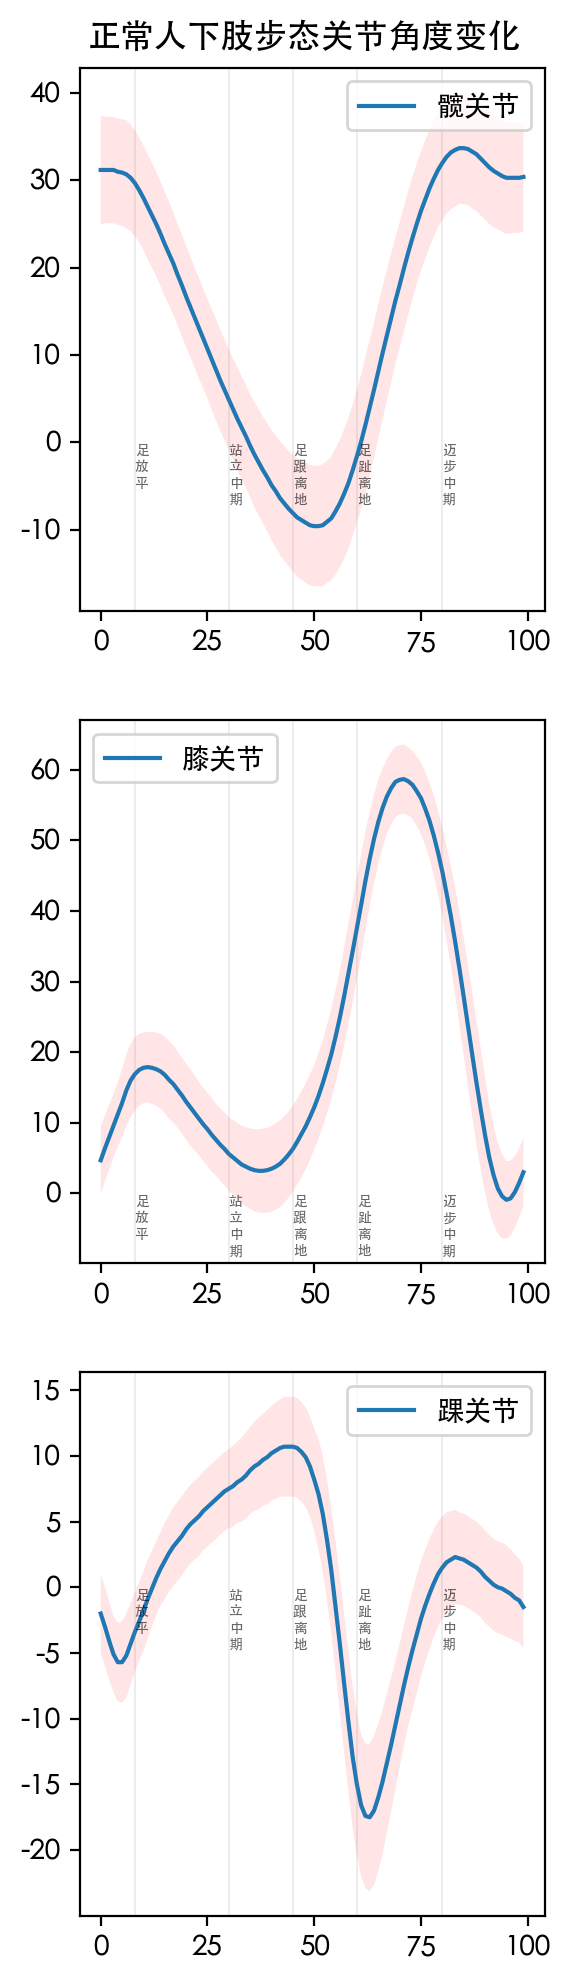

In [45]:
file_path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/工作文档/北京悦动/脑卒中项目/阿帅笔记/HarbinStroke/文档/20220523_正常人步态分析.xlsx"
df = pd.read_excel(file_path,sheet_name="NormGaitAngle")

# 定制画布
fig, axs = plt.subplots(3,1,figsize=(3,12),dpi=200)
# 显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

joint_list = ['髋关节\n平均值（度）','膝关节\n平均值（度）','踝关节\n平均值（度）',]
joint_simple_name = ['髋关节','膝关节','踝关节']
# 循环绘制误差曲线
for i, joint in enumerate(joint_list):
    y = df[joint].values
    x=range(len(y))
    error = df[joint.replace('平均值', '标准差')].values

    """
    # 使用误差线进行绘制
    axs[i].errorbar(x=range(len(y)),
                    y=y, yerr=error, 
                    fmt='-', ecolor='red', alpha=0.5,uplims=3,
                    label=joint_simple_name[i])
    """
    # 使用 fill_between 绘制误差线
    axs[i].plot(y, label=joint_simple_name[i])
    axs[i].fill_between(x,y-error,y+error,facecolor='red', alpha=0.1)
    axs[i].legend()

    # 绘制特征时刻
    x_vals = [8,30,45,60,80]
    events = ["足\n放\n平","站\n立\n中\n期","足\n跟\n离\n地","足\n趾\n离\n地","迈\n步\n中\n期"]
    x_vals_events = dict(zip(x_vals,events))
    for x_val in x_vals:
            axs[i].axvline(x_val, color="gray",linewidth=0.1)
            axs[i].text(x_val, 0,x_vals_events[x_val],
                        fontsize=5,va="top",alpha=0.6)

plt.suptitle("正常人下肢步态关节角度变化", y=0.9)
plt.show()


In [29]:
x_vals = [8,30,45,60,80]
events = ["足放平","站立中期","足跟离地","足趾离地","迈步中期"]
x_vals_events = dict(zip(x_vals,events))
x_vals_events

{8: '足放平', 30: '站立中期', 45: '足跟离地', 60: '足趾离地', 80: '迈步中期'}

In [46]:
context = "1,2,3,4,5,6,7,8,9,10,11,12"
values = context.split(",")  # 将字符串转换为列表
values[3] = "fourth"  # 修改列表中的第4个元素
values[7] = "eighth"  # 修改列表中的第8个元素
result = ",".join(values)  # 将修改后的列表重新转换为字符串
print(result)  # 输出修改后的字符串

1,2,3,fourth,5,6,7,eighth,9,10,11,12


# 合并 Xsens DOT 数据

In [6]:
import pandas as pd
import numpy as np

In [4]:
path  = "/Users/wangshuaibo/Downloads/20230525_102929"
os.chdir(path)
file = "Xsens DOT0_20230525_102929_097.csv"

In [5]:
quats_df = pd.DataFrame()
for file in os.listdir():
    if ".csv" in file:
        df = pd.read_csv(file,skiprows=10)
        quat_list = ['Quat_W', 'Quat_X', 'Quat_Y','Quat_Z',]
        df_quat = df[quat_list]
        quats_df = pd.concat([quats_df,df_quat],axis=1)

In [7]:
time = np.arange(0, len(quats_df) * 0.01, 0.01)

# 在 DataFrame 的第一列插入一列 time
quats_df.insert(0, 'time', time)

In [8]:
quats_df.to_csv("test.csv",index=False)

In [23]:
txt = "one one was a race horse, two two was one too."

x = txt.replace("one", "three", )

print(x)

TypeError: 'list' object cannot be interpreted as an integer

In [37]:
string = "1,2,3,4,7,8,9,10"
replace_indices = [7]
new_char = "\t"

# 将字符串转换为列表
string_list = list(string)

# 替换指定位置的字符
for index in replace_indices:
    string_list[index] = new_char

# 将列表转换回字符串
new_string = "".join(string_list)

print(new_string)

1,2,3,4	7,8,9,10


In [40]:
string = "1,2,3,4,7,8,9,10"
replace_indices = [7]
new_char = "\t"

# 将字符串转换为列表
string_list = string.split(",")

# 替换指定位置的字符
for index in replace_indices:
    string_list[index] = new_char

# 将列表转换回字符串
new_string = ",".join(string_list)

print(new_string)

1,2,3,4,7,8,9,	


# 统计分析测试数据

In [5]:
path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/工作文档/北京悦动/脑卒中项目/阿帅笔记/HarbinStroke"
filename = "20230527_测试数据记录.xlsx"
os.chdir(path)

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import os
df = pd.read_excel(filename)
df.head(3)

,测试日期,受试者姓名,鞋垫编号,模块编号,动作名称,英文名称,视频,足底压力,鞋垫,Xsens,LMPS,步态分析,足底压力分析,备注,Unnamed: 14
0,2023.5.9,贾丽霞,2-0,41-AB,穿鞋-1,Shoes,2,1,2,2,2,已发送,已发送,NaN,NaN
1,2023.5.9,贾丽霞,2-1,42-AB,穿鞋-2,Shoes,1,2,3,3,3,已发送,已发送,NaN,NaN
2,2023.5.9,贾丽霞,2-1,43-AB,穿鞋-3,Shoes,3,3,4,4,Nan,已发送,已发送,小蓝块4的数据被 5 覆盖,NaN


In [13]:
df["测试日期"].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

ValueError: could not convert string to float: '2023.5.9'

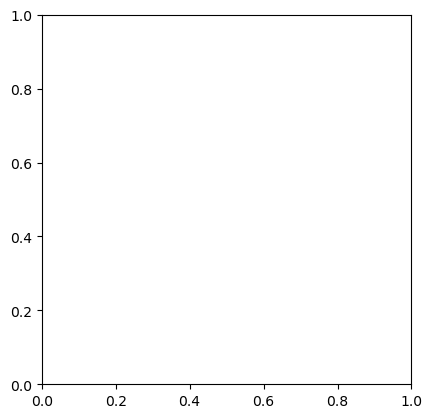

In [6]:
## 验证Xsens Dot 离线采集方案
import os
import pandas as pd
path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/工作文档/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230616iPod连接XsensDot上限/20230616_10个XsensDot_离线采集10分钟数据_蓝牙导出数据用时30分钟"
os.chdir(path)

for file in os.listdir():
    df = pd.read_csv(file,skiprows=6)
    print(f"{file}共采集数据{df.shape[0]}行数据")

Xsens DOT_D4CA6EF19A30_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D4CA6EF199A6_20230616_170655.csv共采集数据35994行数据
Xsens DOT1_D422CD0006AB_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D4CA6EF19984_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D4CA6EF19982_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D422CD000127_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D422CD0002D9_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D422CD0007F6_20230616_170655.csv共采集数据35994行数据
Xsens DOT0_D422CD0007C7_20230616_170655.csv共采集数据35994行数据
XsensDOT_D422CD00028A_20230616_170655.csv共采集数据35994行数据



**同时离线采集 7 个Xsens Dot 的数据**
采集时常 2 分钟，采集频率为 60 HZ，
- 3 个传感器采集的数量为 7728个数据，为 128.8s，
- 4 个传感器采集的数量为 1428个数据，为 23.8 s。

详细数据为：

Xsens DOT_D422CD000127_20230616_165534.csv共采集数据1428行数据
XsensDOT_D422CD00028A_20230616_165534.csv共采集数据7728行数据
Xsens DOT_D422CD0002D9_20230616_165534.csv共采集数据7728行数据
Xsens DOT1_D422CD0006AB_20230616_165534.csv共采集数据7728行数据
Xsens DOT_D4CA6EF19982_20230616_165534.csv共采集数据1428行数据
Xsens DOT_D4CA6EF199A6_20230616_165534.csv共采集数据1428行数据
Xsens DOT_D4CA6EF19A30_20230616_165534.csv共采集数据1428行数据

**同时离线采集 10 个Xsens Dot 的数据**
采集时常 10 分钟，采集频率为 60 HZ，
几乎没有丢包，所有传感器采集 9.998 分钟的数据


详细数据为：

Xsens DOT_D4CA6EF19A30_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D4CA6EF199A6_20230616_170655.csv共采集数据35994行数据
Xsens DOT1_D422CD0006AB_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D4CA6EF19984_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D4CA6EF19982_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D422CD000127_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D422CD0002D9_20230616_170655.csv共采集数据35994行数据
Xsens DOT_D422CD0007F6_20230616_170655.csv共采集数据35994行数据
Xsens DOT0_D422CD0007C7_20230616_170655.csv共采集数据35994行数据
XsensDOT_D422CD00028A_20230616_170655.csv共采集数据35994行数据

## 结论
- iPod 蓝牙实时连接 Xsens Dot 数量上限为 5 个，超出 5 个，连接是 Xsens Dot 会提示最多连接 5 个。
- iPod 蓝牙离线模式连接 Xsens Dot 数量大于5个，已经尝试连接 10个，应该可以连接更多设备。
- 离线模式连接 10 个Xsens Dot 采集数据较为稳定，需要采集更多数据验证稳定性
- 使用蓝牙导出 10个Xsens Dot 离线采集 10分钟的数据，用时为 30 分钟
- Xsens Dot 开始时间有 UTC 时间

In [10]:
35994/60/60

9.998333333333333